# DelDOT Revision of Deterioration Models for MAP-21 measures

## Author: Md Shafiul Azam, PhD,PE
### First Written:  February 2, 2021
### Revision: February 23, 2021
### Revision: March 18, 2021
### Revision: June 11, 2021 by Aditya R

In [1]:
#The first step is to load data into pandas dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_nmf = pd.read_csv(r'C:\Projects\DelDOT\ShafiulFiles\NetworkMaster2020.csv')
print (df_nmf.head(5))

        MGMT_SECTION_SET_ID Video Log Link        Route Direction  Begin Mile  \
0  Normal Analysis Sections          Video  NC-00364A-F       All        0.00   
1  Normal Analysis Sections          Video   NC-00383-F       All        0.00   
2  Normal Analysis Sections          Video   NC-00384-F       All        0.00   
3  Normal Analysis Sections          Video   NC-00378-F       All        0.00   
4  Normal Analysis Sections          Video   NC-00378-F       All        1.01   

   End Mile  Year  Time (Year) Crack Seal Candidate (Y/N)  Speed Limit  ...  \
0      0.26  2020           43                        Yes         25.0  ...   
1      1.37  2020           16                        Yes         40.0  ...   
2      0.90  2020           29                         No         35.0  ...   
3      1.01  2020           15                        Yes         25.0  ...   
4      2.11  2020           16                        Yes         40.0  ...   

       HQ Owner  Last Chip Seal Year  

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (41,85,88,119) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_dist2015 = pd.read_csv (r'C:\Projects\DelDOT\ShafiulFiles\Condition Data Prod 2015.csv')
df_dist2017 = pd.read_csv (r'C:\Projects\DelDOT\ShafiulFiles\Condition Data Prod 2017.csv')
df_dist2019 = pd.read_csv (r'C:\Projects\DelDOT\ShafiulFiles\Condition Data Prod 2019.csv')
df_dist2020 = pd.read_csv (r'C:\Projects\DelDOT\ShafiulFiles\Condition Data Prod 2020.csv')

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (26,32,36,39,42,174) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,21,35,42,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,35,42,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWar

In [3]:
df_dist2017.head()

,Effective Date,Year,Route,Direction,Lane,Begin Mile,End Mile,# of Lanes,District ID,Pavement Type,...,HQ Owner,Joint Reflection Low - LF,Joint Reflection Med - LF,Slab Crack High - LF,Slab Crack Low - LF,Slab Crack Medium - LF,Unclassified Cracking High (LF),Unclassified Cracking Low (LF),Unclassified Cracking Med (LF),Crack Seal Candidate (Y/N)
0,11/13/2016,2017,KC-00001-F,N/E,All,0.0,0.1,2.0,Central,Composite,...,Headquarters,26.1,0.0,0.0,0.0,0.0,0.0,24.4,1.6,No
1,11/13/2016,2017,KC-00001-F,N/E,All,0.1,0.2,2.0,Central,Composite,...,Headquarters,0.0,0.0,0.0,0.0,0.0,0.0,17.3,0.3,No
2,11/13/2016,2017,KC-00001-F,N/E,All,0.2,0.3,2.0,Central,Composite,...,Headquarters,0.0,0.0,0.0,0.0,0.0,0.2,8.5,1.7,No
3,11/13/2016,2017,KC-00001-F,N/E,All,0.3,0.4,2.0,Central,Composite,...,Headquarters,23.6,3.9,0.0,0.0,0.0,0.0,11.7,2.2,No
4,11/13/2016,2017,KC-00001-F,N/E,All,0.4,0.5,2.0,Central,Composite,...,Headquarters,17.7,0.0,0.0,0.0,0.0,0.0,11.8,0.8,No


In [4]:
df_dist2019['Pavement Type'].value_counts()

Asphalt      39238
ST           11863
Composite    10623
PCC           2612
Name: Pavement Type, dtype: int64

In [5]:
print ("2019 Number of records before removing duplicates:",len(df_dist2019))
df_nmf=df_nmf.drop_duplicates()
print ("2019 Number of records after removing duplicates:",len(df_dist2019))
df_dist2019=df_dist2019.dropna(subset=['Route', 'Lane','Begin Mile','End Mile'], how='all')
print ("2019 Number of records after dropping null indices:",len(df_dist2019))
print ("2017 Number of records before removing duplicates:",len(df_dist2017))
df_nmf=df_nmf.drop_duplicates()
print ("2017 Number of records after removing duplicates:",len(df_dist2017))
df_dist2017=df_dist2017.dropna(subset=['Route', 'Lane','Begin Mile','End Mile'], how='all')
print ("2017 Number of records after dropping null indices:",len(df_dist2017))
print ("2015 Number of records before removing duplicates:",len(df_dist2015))
df_nmf=df_nmf.drop_duplicates()
print ("2015 Number of records after removing duplicates:",len(df_dist2015))
df_dist2015=df_dist2015.dropna(subset=['Route', 'Lane','Begin Mile','End Mile'], how='all')
print ("2015 Number of records after dropping null indices:",len(df_dist2015))

2019 Number of records before removing duplicates: 64336
2019 Number of records after removing duplicates: 64336
2019 Number of records after dropping null indices: 64336
2017 Number of records before removing duplicates: 63689
2017 Number of records after removing duplicates: 63689
2017 Number of records after dropping null indices: 63674
2015 Number of records before removing duplicates: 62333
2015 Number of records after removing duplicates: 62333
2015 Number of records after dropping null indices: 62313


In [6]:
print ("2020 Number of records before removing duplicates:",len(df_dist2020))
df_nmf=df_nmf.drop_duplicates()
print ("2020 Number of records after removing duplicates:",len(df_dist2020))
df_dist2020=df_dist2020.dropna(subset=['Route', 'Lane','Begin Mile','End Mile'], how='all')
print ("2020 Number of records after dropping null indices:",len(df_dist2020))

2020 Number of records before removing duplicates: 4392
2020 Number of records after removing duplicates: 4392
2020 Number of records after dropping null indices: 4392


In [7]:
dt_2020=df_dist2020.set_index(['Route', 'Lane','Begin Mile','End Mile'])
dt_2019=df_dist2019.set_index(['Route', 'Lane','Begin Mile','End Mile'])
dt_2017=df_dist2017.set_index(['Route', 'Lane','Begin Mile','End Mile'])
dt_2015=df_dist2015.set_index(['Route', 'Lane','Begin Mile','End Mile'])

In [8]:
dt_2019[['Year','MAP21 IRI AVG','MAP21 Cracking Percent ','MAP21 Rutting AVG','MAP21 Faulting RWP AVG']]

Year  MAP21 IRI AVG  \
Route       Lane Begin Mile End Mile                        
KC-00001-F  All  0.00       0.12      2019          104.0   
                 0.12       0.22      2019          130.5   
                 0.22       0.31      2019          113.5   
                 0.31       0.40      2019          123.0   
                 0.40       0.50      2019          113.0   
...                                    ...            ...   
SC-307555-F All  0.00       0.10      2019          172.5   
SC-307556-F All  0.00       0.10      2019          150.0   
                 0.10       0.12      2019            0.0   
SC-307560-F All  0.00       0.04      2019            0.0   
SC-307570-F All  0.00       0.08      2019            0.0   

                                      MAP21 Cracking Percent   \
Route       Lane Begin Mile End Mile                            
KC-00001-F  All  0.00       0.12                         5.58   
                 0.12       0.22                         4.08   
                 0.22       0.31                         0.39   
                 0.31       0.40                         1.74   
                 0.40       0.50                         1.54   
...                                                       ...   
SC-307555-F All  0.00       0.10                         0.51   
SC-307556-F All  0.00       0.10                         0.24   
                 0.10       0.12                         0.93   
SC-307560-F All  0.00       0.04                         6.48   
SC-307570-F All  0.00       0.08                         4.38   

                                      MAP21 Rutting AVG  \
Route       Lane Begin Mile End Mile                      
KC-00001-F  All  0.00       0.12                   0.04   
                 0.12       0.22                   0.05   
                 0.22       0.31                   0.04   
                 0.31       0.40                   0.05   
                 0.40       0.50                   0.05   
...                                                 ...   
SC-307555-F All  0.00       0.10                   0.12   
SC-307556-F All  0.00       0.10                   0.08   
                 0.10       0.12                   0.14   
SC-307560-F All  0.00       0.04                   0.07   
SC-307570-F All  0.00       0.08                   0.07   

                                      MAP21 Faulting RWP AVG  
Route       Lane Begin Mile End Mile                          
KC-00001-F  All  0.00       0.12                         0.0  
                 0.12       0.22                         0.0  
                 0.22       0.31                         0.0  
                 0.31       0.40                         0.0  
                 0.40       0.50                         0.0  
...                                                      ...  
SC-307555-F All  0.00       0.10                         0.0  
SC-307556-F All  0.00       0.10                         0.0  
                 0.10       0.12                         0.0  
SC-307560-F All  0.00       0.04                         0.0  
SC-307570-F All  0.00       0.08                         0.0  

[64336 rows x 5 columns]

In [9]:
#remove any duplicated indices
dt_2015=dt_2015[~dt_2015.index.duplicated()]
dt_2017=dt_2017[~dt_2017.index.duplicated()]
dt_2019=dt_2019[~dt_2019.index.duplicated()]
dt_2020=dt_2020[~dt_2020.index.duplicated()]

In [10]:
df_const = pd.read_csv (r'C:\Projects\DelDOT\ShafiulFiles\Construction History DelDOT.csv')
print (df_const.head(5))
df_const.columns

        Route Direction Lane  Begin Mile  End Mile  Length  \
0  SC-00086-F       All    2        0.00      0.54     NaN   
1  SC-00297-F       All    2        1.25      5.43     NaN   
2  SC-00318-F       All  All        2.74      5.85     NaN   
3  SC-00318-F       All  All        2.74      5.85     NaN   
4  SC-00318-F       All  All        2.74      5.85     NaN   

  Constr. History Section            ID  Year Completion           Work Code  \
0            202000308633  202000308633           2020.0  Structural Overlay   
1            202000329701  202000329701           2020.0  Structural Overlay   
2              2020003182    2020003182           2020.0         AC Patching   
3              2020003186    2020003186           2020.0         AC Patching   
4              2020003188    2020003188           2020.0         AC Patching   

   ... Hotmix Tons                    DE LOC COMMENT  DE LOC COST  \
0  ...      919.78  Ave of Honor Georgetown Delaware    129439.56   
1  ...  

Index(['Route', 'Direction', 'Lane', 'Begin Mile', 'End Mile', 'Length',
       'Constr. History Section', 'ID', 'Year Completion', 'Work Code',
       'Project Location Begin', 'Project Location End', 'Typical Section',
       'Treatment', 'Effective Date', 'Derived Func Class ID', 'District ID',
       'Representative District Number', 'Senate District Number',
       'Hotmix Tons', 'DE LOC COMMENT', 'DE LOC COST', 'Percent. Patching',
       'DE RESURF WIDTH', 'Shoulder Thickness', 'HQ Owner', 'DelDot Contract',
       'Shoulder Width', 'Source Table Name'],
      dtype='object')

In [11]:
df_nmf['Pavement Type'].value_counts()

Asphalt      17118
Composite     1094
ST             926
PCC            330
Name: Pavement Type, dtype: int64

In [12]:
#Let's check the construction history routes
df_const[['Route', 'Begin Mile', 'End Mile']]

,Route,Begin Mile,End Mile
0,SC-00086-F,0.00,0.54
1,SC-00297-F,1.25,5.43
2,SC-00318-F,2.74,5.85
3,SC-00318-F,2.74,5.85
4,SC-00318-F,2.74,5.85
...,...,...,...
18712,SC-00413B-F,0.00,1.95
18713,SC-00421-F,7.17,7.40
18714,SC-00431-F,4.42,6.81
18715,SC-00433-F,0.00,0.52


In [13]:
dt_17_19 = pd.concat([dt_2017[['MAP21 IRI AVG','MAP21 Cracking Percent ','MAP21 Rutting AVG','MAP21 Faulting RWP AVG']],
                      dt_2019[['MAP21 IRI AVG','MAP21 Cracking Percent ','MAP21 Rutting AVG','MAP21 Faulting RWP AVG']]], axis=1,join="inner")

dt_17_19.columns =['MAP21 IRI AVG 17', 'MAP21 Cracking Percent 17', 'MAP21 Rutting AVG 17', 'MAP21 Faulting RWP AVG 17',
                   'MAP21 IRI AVG 19', 'MAP21 Cracking Percent 19', 'MAP21 Rutting AVG 19', 'MAP21 Faulting RWP AVG 19']
print('17-19: ',len(dt_17_19))
dt_17_19.head()

17-19:  26736


MAP21 IRI AVG 17  \
Route       Lane Begin Mile End Mile                     
KC-00428-F  All  0.2        0.30                 202.5   
NC-00013-F  All  0.6        0.70                  94.0   
NC-00225-F  All  4.3        4.40                 123.5   
                 4.8        4.90                 137.0   
NC-138310-F All  0.0        0.04                 181.0   

                                      MAP21 Cracking Percent 17  \
Route       Lane Begin Mile End Mile                              
KC-00428-F  All  0.2        0.30                           1.23   
NC-00013-F  All  0.6        0.70                           4.86   
NC-00225-F  All  4.3        4.40                           0.12   
                 4.8        4.90                           0.11   
NC-138310-F All  0.0        0.04                          30.86   

                                      MAP21 Rutting AVG 17  \
Route       Lane Begin Mile End Mile                         
KC-00428-F  All  0.2        0.30                      0.14   
NC-00013-F  All  0.6        0.70                      0.06   
NC-00225-F  All  4.3        4.40                      0.11   
                 4.8        4.90                      0.10   
NC-138310-F All  0.0        0.04                      0.12   

                                      MAP21 Faulting RWP AVG 17  \
Route       Lane Begin Mile End Mile                              
KC-00428-F  All  0.2        0.30                            NaN   
NC-00013-F  All  0.6        0.70                            NaN   
NC-00225-F  All  4.3        4.40                            NaN   
                 4.8        4.90                            NaN   
NC-138310-F All  0.0        0.04                            NaN   

                                      MAP21 IRI AVG 19  \
Route       Lane Begin Mile End Mile                     
KC-00428-F  All  0.2        0.30                 190.0   
NC-00013-F  All  0.6        0.70                 103.0   
NC-00225-F  All  4.3        4.40                 121.0   
                 4.8        4.90                 142.5   
NC-138310-F All  0.0        0.04                   0.0   

                                      MAP21 Cracking Percent 19  \
Route       Lane Begin Mile End Mile                              
KC-00428-F  All  0.2        0.30                           0.04   
NC-00013-F  All  0.6        0.70                           6.85   
NC-00225-F  All  4.3        4.40                           0.37   
                 4.8        4.90                           0.40   
NC-138310-F All  0.0        0.04                          32.19   

                                      MAP21 Rutting AVG 19  \
Route       Lane Begin Mile End Mile                         
KC-00428-F  All  0.2        0.30                      0.15   
NC-00013-F  All  0.6        0.70                      0.08   
NC-00225-F  All  4.3        4.40                      0.13   
                 4.8        4.90                      0.10   
NC-138310-F All  0.0        0.04                      0.08   

                                      MAP21 Faulting RWP AVG 19  
Route       Lane Begin Mile End Mile                             
KC-00428-F  All  0.2        0.30                            0.0  
NC-00013-F  All  0.6        0.70                            0.0  
NC-00225-F  All  4.3        4.40                            0.0  
                 4.8        4.90                            0.0  
NC-138310-F All  0.0        0.04                            0.0

In [14]:
#No filters applied (keep just in case any filters need to be applied) - previously Strictly monotonous decrease
dt_17_19_filtered = dt_17_19
dt_17_19_filtered.head()

MAP21 IRI AVG 17  \
Route       Lane Begin Mile End Mile                     
KC-00428-F  All  0.2        0.30                 202.5   
NC-00013-F  All  0.6        0.70                  94.0   
NC-00225-F  All  4.3        4.40                 123.5   
                 4.8        4.90                 137.0   
NC-138310-F All  0.0        0.04                 181.0   

                                      MAP21 Cracking Percent 17  \
Route       Lane Begin Mile End Mile                              
KC-00428-F  All  0.2        0.30                           1.23   
NC-00013-F  All  0.6        0.70                           4.86   
NC-00225-F  All  4.3        4.40                           0.12   
                 4.8        4.90                           0.11   
NC-138310-F All  0.0        0.04                          30.86   

                                      MAP21 Rutting AVG 17  \
Route       Lane Begin Mile End Mile                         
KC-00428-F  All  0.2        0.30                      0.14   
NC-00013-F  All  0.6        0.70                      0.06   
NC-00225-F  All  4.3        4.40                      0.11   
                 4.8        4.90                      0.10   
NC-138310-F All  0.0        0.04                      0.12   

                                      MAP21 Faulting RWP AVG 17  \
Route       Lane Begin Mile End Mile                              
KC-00428-F  All  0.2        0.30                            NaN   
NC-00013-F  All  0.6        0.70                            NaN   
NC-00225-F  All  4.3        4.40                            NaN   
                 4.8        4.90                            NaN   
NC-138310-F All  0.0        0.04                            NaN   

                                      MAP21 IRI AVG 19  \
Route       Lane Begin Mile End Mile                     
KC-00428-F  All  0.2        0.30                 190.0   
NC-00013-F  All  0.6        0.70                 103.0   
NC-00225-F  All  4.3        4.40                 121.0   
                 4.8        4.90                 142.5   
NC-138310-F All  0.0        0.04                   0.0   

                                      MAP21 Cracking Percent 19  \
Route       Lane Begin Mile End Mile                              
KC-00428-F  All  0.2        0.30                           0.04   
NC-00013-F  All  0.6        0.70                           6.85   
NC-00225-F  All  4.3        4.40                           0.37   
                 4.8        4.90                           0.40   
NC-138310-F All  0.0        0.04                          32.19   

                                      MAP21 Rutting AVG 19  \
Route       Lane Begin Mile End Mile                         
KC-00428-F  All  0.2        0.30                      0.15   
NC-00013-F  All  0.6        0.70                      0.08   
NC-00225-F  All  4.3        4.40                      0.13   
                 4.8        4.90                      0.10   
NC-138310-F All  0.0        0.04                      0.08   

                                      MAP21 Faulting RWP AVG 19  
Route       Lane Begin Mile End Mile                             
KC-00428-F  All  0.2        0.30                            0.0  
NC-00013-F  All  0.6        0.70                            0.0  
NC-00225-F  All  4.3        4.40                            0.0  
                 4.8        4.90                            0.0  
NC-138310-F All  0.0        0.04                            0.0

In [15]:
dt_17_19_filtered=dt_17_19_filtered.reset_index()
print(len(dt_17_19_filtered))

26736


In [16]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [17]:
#merge 2017-2019 condition dataset with network master (Route field)
dt_17_19_fil_nmf= pd.merge(left=dt_17_19_filtered, right=df_nmf, how='left', left_on=['Route'], right_on=['Route'])

print(dt_17_19_fil_nmf.columns)
print (len(dt_17_19_fil_nmf))

Index(['Route', 'Lane', 'Begin Mile_x', 'End Mile_x', 'MAP21 IRI AVG 17', 'MAP21 Cracking Percent 17', 'MAP21 Rutting AVG 17', 'MAP21 Faulting RWP AVG 17', 'MAP21 IRI AVG 19', 'MAP21 Cracking Percent 19',
       ...
       'HQ Owner', 'Last Chip Seal Year', 'Years Since Last Chipseal', 'Last Crack Sealing Year', 'Years Since Last Crack Seal', 'Year of Last Preservation', 'Years Since Last Preservation', 'Preservation Count', 'RSL', 'Is Ramp?'], dtype='object', length=147)
73424


In [18]:
dt_17_19_fil_nmf.head(5)

,Route,Lane,Begin Mile_x,End Mile_x,MAP21 IRI AVG 17,MAP21 Cracking Percent 17,MAP21 Rutting AVG 17,MAP21 Faulting RWP AVG 17,MAP21 IRI AVG 19,MAP21 Cracking Percent 19,MAP21 Rutting AVG 19,MAP21 Faulting RWP AVG 19,MGMT_SECTION_SET_ID,Video Log Link,Direction,Begin Mile_y,End Mile_y,Year,Time (Year),Crack Seal Candidate (Y/N),Speed Limit,Fatigue Index,Roughness Index,Jnt. Refl. Index,NWP Longitudinal Crack Index,Transverse Crack Index,Patching Index,Bleeding Index,Edge Crack Index,Crown > 6% Index,ASR Index,Faulting Index,Joint Det. Index,Joint Seal Index,Slab Crack Index,Surface Defects Index,Mgmt. Section #,Treatment,Treatment Cost,ROUTE DESCRIPTION,Begin Description,End Description,Length,# of Lanes,Lane Miles,Width,Left Shoulder Width,Rt Shoulder Width,Pavement Structure,Pavement Type,Left Shoulder Type,Rt Shoulder Type,Surface Contract,Base,SURF THICK,Total Thickness,Func Class ID,County ID,Block index,Subdivision Name,District ID,DE REP DIST,Crown > 6% - Percent,Interstate Flag,DE SEN DIST,Maintenance Area ID,Municipal Area Limits,NHS Code,System Class Code ID,Traffic Data Year,AADT,Percent Truck,Representative District,Senate District,Curbs (Y/N),Work Code,Year Constructed,Last Rehab Year,LAST TREATMENT DATE,LAST SURVEY DATE,LAST TREATMENT YEAR,Pavement Age,Road Structure Category,Controlling OPC Index,OPC Index,Functional Index,Non-Structural Index,Structural Index,MAP21 Condition Category,MAP21 Cracking Percent,MAP21 Cracking Condition Category,MAP21 IRI AVG,MAP21 IRI Condition Category,MAP21 Rutting AVG,MAP21 Rutting Condition Category,MAP21 Faulting RWP AVG,MAP21 Faulting Condition Category,Joint Index,Slab Index,IRI Average - inch/mile,ASR Percent,Block Crack High - Percent,Block Crack Med - Percent,Fatigue High - Percent,Fatigue Med - Percent,Joint Reflection High - Percent,Joint Reflection Medium - Percent,Patch Pothole High - Percent,Patch Pothole Medium - Percent,Rutting Average,Rutting High - Percent,Rutting Low - Percent,Rutting Maximum,Rutting Medium - Percent,Slab Crack Medium - Percent,Transverse Crack High - Percent,Transverse Crack Medium - Percent,Joint Deterioration High - Percent,Joint Deterioration Medium - Percent,Joint Seal High - Percent,Patching Deterioration High - Percent,Patching Deterioration Medium - Percent,Slab Crack High - Percent,Last Improvement Year,Fed. Aid Designation ID,Performance Year,Last Treatment,Last Treatment Rehab (Y/N),Last Treatment Rejuvenator (Y/N),Years Since Last Rejuvenator,INDUSTRIAL PARK,Attachment,Comments,User Update,Date Update,Condition Report,GIS Roadway ID,HQ Owner,Last Chip Seal Year,Years Since Last Chipseal,Last Crack Sealing Year,Years Since Last Crack Seal,Year of Last Preservation,Years Since Last Preservation,Preservation Count,RSL,Is Ramp?
0,KC-00428-F,All,0.2,0.3,202.5,1.23,0.14,NaN,190.0,0.04,0.15,0.0,Normal Analysis Sections,Video,All,0.00,1.10,2020.0,35.0,No,50.0,99.2,93.7,NaN,98.0,98.9,100.0,100.0,100.0,83.9,NaN,NaN,NaN,NaN,NaN,100.0,51656613.0,Chipseal,14713.60,WINKLER ROAD,KC-00035-F (CARPENTER BRIDGE ROAD),KC-00005-R (SOUTH DUPONT HIGHWAY ROUTE US13).....,1.10,2.0,2.20,19.0,3.0,3.0,Surface Treatment,ST,Bituminous Concrete,No Shoulders,9947,No,0.5,6.5,Locals,Kent,99.5,NaN,Central,30.0,7.4,No,18.0,Harrington,NaN,No,NaN,2019.0,310.00,6.90,Rep District 30,Senate District 18,No,Surface Treat,1985.0,1985.0,NaN,9/9/2019,2011.0,35.0,Surface Treated,Functional Index,69.9,70.4,97.3,99.2,Fair,0.27,Good,216.64,Poor,0.16,Good,0.0,NaN,NaN,NaN,216.6,NaN,0.0,0.0,0.0,0.1,NaN,NaN,0.0,NaN,0.2,0.3289,90.6471,0.6918,31.2681,NaN,0.0,0.8658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,Chipseal,No,No,100.0,NaN,NaN,NaN,NaN,NaN,1-Good,922.0,Headquarters,2011.0,9.0,NaN,NaN,NaN,NaN,0.0,8.2581,No
1,NC-00013-F,All,0.6,0.7,94.0,4.86,0.06,NaN,103.0,6.85,0.08,0.0,Normal Analysis Sections,Video,All,0.00,0.43,2020.0,17.0,Yes,25.0,71.8,94.4,89.9,97.9,NaN,99.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,51657214.0,Rehab - Functional,118212.16,NORTH CHAPEL STREET,NC-00011-R (E. MAIN STREET RO

In [19]:
#merge 2017-2019 condition dataset with network master (BMP and EMP)
dt_17_19_fil_nmf_exp = dt_17_19_fil_nmf[
         (dt_17_19_fil_nmf['End Mile_x'] <= dt_17_19_fil_nmf['End Mile_y']) & 
         (dt_17_19_fil_nmf['Begin Mile_x'] >= dt_17_19_fil_nmf['Begin Mile_y'])]

print(len(dt_17_19_fil_nmf_exp))
dt_17_19_fil_nmf_exp.head(7)

23931


,Route,Lane,Begin Mile_x,End Mile_x,MAP21 IRI AVG 17,MAP21 Cracking Percent 17,MAP21 Rutting AVG 17,MAP21 Faulting RWP AVG 17,MAP21 IRI AVG 19,MAP21 Cracking Percent 19,MAP21 Rutting AVG 19,MAP21 Faulting RWP AVG 19,MGMT_SECTION_SET_ID,Video Log Link,Direction,Begin Mile_y,End Mile_y,Year,Time (Year),Crack Seal Candidate (Y/N),Speed Limit,Fatigue Index,Roughness Index,Jnt. Refl. Index,NWP Longitudinal Crack Index,Transverse Crack Index,Patching Index,Bleeding Index,Edge Crack Index,Crown > 6% Index,ASR Index,Faulting Index,Joint Det. Index,Joint Seal Index,Slab Crack Index,Surface Defects Index,Mgmt. Section #,Treatment,Treatment Cost,ROUTE DESCRIPTION,Begin Description,End Description,Length,# of Lanes,Lane Miles,Width,Left Shoulder Width,Rt Shoulder Width,Pavement Structure,Pavement Type,Left Shoulder Type,Rt Shoulder Type,Surface Contract,Base,SURF THICK,Total Thickness,Func Class ID,County ID,Block index,Subdivision Name,District ID,DE REP DIST,Crown > 6% - Percent,Interstate Flag,DE SEN DIST,Maintenance Area ID,Municipal Area Limits,NHS Code,System Class Code ID,Traffic Data Year,AADT,Percent Truck,Representative District,Senate District,Curbs (Y/N),Work Code,Year Constructed,Last Rehab Year,LAST TREATMENT DATE,LAST SURVEY DATE,LAST TREATMENT YEAR,Pavement Age,Road Structure Category,Controlling OPC Index,OPC Index,Functional Index,Non-Structural Index,Structural Index,MAP21 Condition Category,MAP21 Cracking Percent,MAP21 Cracking Condition Category,MAP21 IRI AVG,MAP21 IRI Condition Category,MAP21 Rutting AVG,MAP21 Rutting Condition Category,MAP21 Faulting RWP AVG,MAP21 Faulting Condition Category,Joint Index,Slab Index,IRI Average - inch/mile,ASR Percent,Block Crack High - Percent,Block Crack Med - Percent,Fatigue High - Percent,Fatigue Med - Percent,Joint Reflection High - Percent,Joint Reflection Medium - Percent,Patch Pothole High - Percent,Patch Pothole Medium - Percent,Rutting Average,Rutting High - Percent,Rutting Low - Percent,Rutting Maximum,Rutting Medium - Percent,Slab Crack Medium - Percent,Transverse Crack High - Percent,Transverse Crack Medium - Percent,Joint Deterioration High - Percent,Joint Deterioration Medium - Percent,Joint Seal High - Percent,Patching Deterioration High - Percent,Patching Deterioration Medium - Percent,Slab Crack High - Percent,Last Improvement Year,Fed. Aid Designation ID,Performance Year,Last Treatment,Last Treatment Rehab (Y/N),Last Treatment Rejuvenator (Y/N),Years Since Last Rejuvenator,INDUSTRIAL PARK,Attachment,Comments,User Update,Date Update,Condition Report,GIS Roadway ID,HQ Owner,Last Chip Seal Year,Years Since Last Chipseal,Last Crack Sealing Year,Years Since Last Crack Seal,Year of Last Preservation,Years Since Last Preservation,Preservation Count,RSL,Is Ramp?
0,KC-00428-F,All,0.2,0.30,202.5,1.23,0.14,NaN,190.0,0.04,0.15,0.0,Normal Analysis Sections,Video,All,0.00,1.10,2020.0,35.0,No,50.0,99.2,93.7,NaN,98.0,98.9,100.0,100.0,100.0,83.9,NaN,NaN,NaN,NaN,NaN,100.0,51656613.0,Chipseal,14713.60,WINKLER ROAD,KC-00035-F (CARPENTER BRIDGE ROAD),KC-00005-R (SOUTH DUPONT HIGHWAY ROUTE US13).....,1.10,2.0,2.20,19.0,3.0,3.0,Surface Treatment,ST,Bituminous Concrete,No Shoulders,9947,No,0.50,6.50,Locals,Kent,99.5,NaN,Central,30.0,7.4,No,18.0,Harrington,NaN,No,NaN,2019.0,310.00,6.90,Rep District 30,Senate District 18,No,Surface Treat,1985.0,1985.0,NaN,9/9/2019,2011.0,35.0,Surface Treated,Functional Index,69.9,70.4,97.3,99.2,Fair,0.27,Good,216.64,Poor,0.16,Good,0.0,NaN,NaN,NaN,216.6,NaN,0.0,0.0,0.0,0.1,NaN,NaN,0.0,NaN,0.2,0.3289,90.6471,0.6918,31.2681,NaN,0.0000,0.8658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,Chipseal,No,No,100.0,NaN,NaN,NaN,NaN,NaN,1-Good,922.0,Headquarters,2011.0,9.0,NaN,NaN,NaN,NaN,0.0,8.2581,No
2,NC-00013-F,All,0.6,0.70,94.0,4.86,0.06,NaN,103.0,6.85,0.08,0.0,Normal Analysis Sections,Video,All,0.46,2.37,2020.0,41.0,Yes,35.0,92.8,98.1,82.7,94.8,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,51657215.0,Preservation,141187.20,PAPER MILL ROAD,.03 MILES NORTH FROM BRIDGE,.05

In [20]:
#Exclude suburban routes
dt_17_19_fil_nmf_exp = dt_17_19_fil_nmf_exp.loc[(dt_17_19_fil_nmf_exp['Func Class ID'] != "Suburb")]
print(len(dt_17_19_fil_nmf_exp))

17770


In [21]:
#Export to csv: combined 2017-2019 file with network master for Markov modeling (MAP-21 measures)
dt_17_19_fil_nmf_exp.to_csv(r'C:\Projects\DelDOT\ShafiulFiles\combined17_19_MAP21.csv', index = False)

(0.0, 100.0)

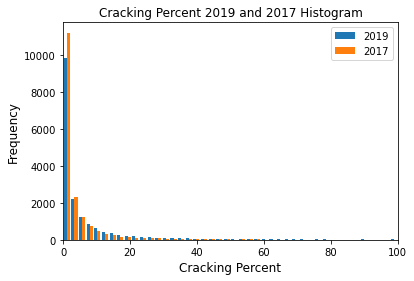

In [22]:
plt.hist([dt_17_19_fil_nmf_exp['MAP21 Cracking Percent 19'],dt_17_19_fil_nmf_exp['MAP21 Cracking Percent 17']] 
         , label=['2019','2017'], bins=100)
plt.xlabel("Cracking Percent", fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.title('Cracking Percent 2019 and 2017 Histogram')
plt.legend()
plt.xlim([0,100])

(0.0, 600.0)

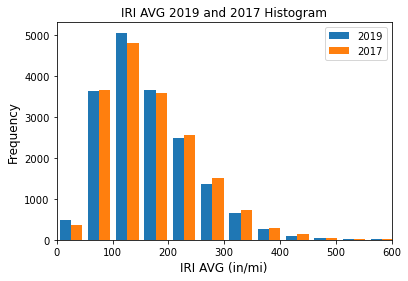

In [23]:
plt.hist([dt_17_19_fil_nmf_exp['MAP21 IRI AVG 19'],dt_17_19_fil_nmf_exp['MAP21 IRI AVG 17']]
         , label=['2019','2017'], bins=50)
plt.xlabel("IRI AVG (in/mi)", fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.title('IRI AVG 2019 and 2017 Histogram')
plt.legend()
plt.xlim([0,600])

In [24]:
#Filter Pavement Type != "PCC" for Rutting
dt_17_19_fil_nmf_exp_NotPCC = dt_17_19_fil_nmf_exp.loc[(dt_17_19_fil_nmf_exp['Pavement Type'] != "PCC")]
print(len(dt_17_19_fil_nmf_exp_NotPCC))

17426


(0.0, 1.0)

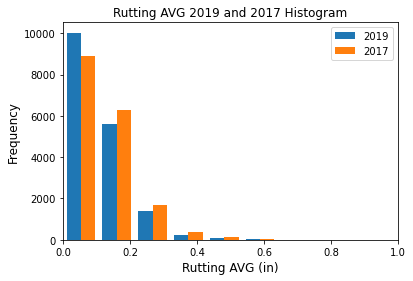

In [25]:
plt.hist([dt_17_19_fil_nmf_exp_NotPCC['MAP21 Rutting AVG 19'],dt_17_19_fil_nmf_exp_NotPCC['MAP21 Rutting AVG 17']]
         , label=['2019', '2017'], bins=10)
plt.xlabel("Rutting AVG (in)", fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.title('Rutting AVG 2019 and 2017 Histogram')
plt.legend()
plt.xlim([0,1])

In [26]:
#Filter Pavement Type = "PCC" for Faulting
dt_17_19_fil_nmf_exp_PCC = dt_17_19_fil_nmf_exp.loc[(dt_17_19_fil_nmf_exp['Pavement Type'] == "PCC")]
print(len(dt_17_19_fil_nmf_exp_PCC))

344


(0.0, 0.7)

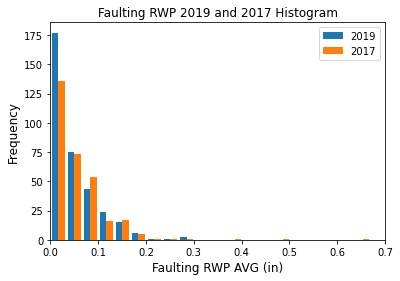

In [27]:
plt.hist([dt_17_19_fil_nmf_exp_PCC['MAP21 Faulting RWP AVG 19'],dt_17_19_fil_nmf_exp_PCC['MAP21 Faulting RWP AVG 17']]
         , label=['2019', '2017'], bins=20)
plt.xlabel("Faulting RWP AVG (in)", fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.title('Faulting RWP 2019 and 2017 Histogram')
plt.legend()
plt.xlim([0,0.7])